## Homework 5

**Note: If this is one of your two late homework submissions, please indicate below; also indicate whether it is your first or second late submission.**

\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_

This homework assignment has **two parts**. In the first, you will practice building a recommender system; in the second, you'll practice training a neural network for image classification. I strongly advise using Lab 8 and Lab 9 for assistance as you work on this assignment. Make sure to **read the entire assignment**.

You also may need to use other functions. I encourage you to make use of available resources (including the Internet) to help you solve these problems. You can also work with your classmates. If you do work together, you must provide the names of those classmates below.

[Names of Collaborators (if any):]{.underline}

### Recommender Systems

We'll work with the data in `data/movies.csv` and `data/movie-ratings.csv`. `movies` contains a list of $9,737$ movies and their basic description – title, year of release, and genres, separated by vertical bars (for example, `Comedy|Romance`). `movie-ratings` contains ratings of movies by $610$ users, on a scale from $0$ to $5$.

The data come from this source at Kaggle: <https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset/>

#### Exercise 1

Read both data files into Python. (You can also use R, if you prefer. If you do use R, I would recommend working with a smaller subset of the data.)

Movie title and year of release are in the same column. Create a new variable that represents year of release, as a four-digit number.

#### Exercise 2

Create a histogram of year of release. How would you describe the shape of the distribution? When were the most movies released?

#### Exercise 3

Create a bar chart of the top 10 highest-rated movies.

#### Exercise 4

Create a variable called `string` that contains the text of each movie's genres, title, and year of release. For example, the value of `string` for `movieID == 3` should be: `"Adventure Children Fantasy Jumanji (1995)"`.

#### Exercise 5

Using the `string` variable, create a tf-idf matrix with `TfidfVectorizer` and `tfv.fit`.

#### Exercise 6

Use the sigmoid kernel from `scikit-learn` to calculate pairwise similarities between all items in your tf-idf matrix.

#### Exercise 7

Define a function, `give_recommendation()`, that takes as input the title of a movie and returns the top 10 most similar movies.

#### Exercise 8

What movies does your recommender system suggest for a user who likes "Toy Story" (released in 1995)?

#### For 234 Students:

#### Exercise 9

Now we'll try making content-based recommendations. Turn the data into a CSR matrix using `scipy.sparse`.

#### Exercise 10

Fit a *k*-nearest neighbors model, using cosine similarity as the distance metric.

#### Exercise 11

Identify which movies your model deems most similar to "GoldenEye" (a James Bond movie, also released in 1995).

### Image Classification

Now we'll work with the data in `data/Animals`. This dataset, intended for animal image classification, [comes from Kaggle.](https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset) It consists of $3,000$ JPEG RGB images, each of which are 256 x 256 pixels, that have been divided into three classes with $1,000$ images in each class. The classes are `cats`, `dogs`, and `snakes`.

#### Exercise 12

Randomly select $150$ images of cats, $150$ images of dogs, and $150$ images of snakes. Set these aside in another directory labeled `test_images` to be your testing set. Using the same approach, randomly select another $150$ images from each class, and set these aside in a `validation_images` directory to be your validation set.

#### Exercise 13

Display a random image from each of the three classes in your training set to verify that the data are set up correctly.

#### Exercise 14

Using `ImageDataGenerator` and `flow_from_directory`, rescale your training, testing, and validation sets. Load and preprocess your images in batches of size $10$.

#### Exercise 15

Set up a convolutional neural net (CNN) with 7 layers using `Sequential()`. The layers should be as follows:

1. 2D convolutional input layer with a ReLU activation function;
2. Max pooling layer for 2D spatial data;
3. 2D convolutional layer with ReLU activation;
4. Max pooling layer for 2D spatial data;
5. Flattening layer;
6. Dense layer with $128$ units and ReLU activation;
7. Dense output layer with softmax activation.

#### Exercise 16

Using Adam and categorical cross-entropy, fit the network you've created and let it run for $12$ epochs.

#### Exercise 17

Create a plot of the accuracy and loss by the number of epochs.

#### For 234 Students:

#### Exercise 18

Look at your model's accuracy on your testing set. How did it do?

#### Exercise 19

Generate your model's prediction for a random image from the dataset.

#### Exercise 20

Create a confusion matrix using your testing set. Visualize the matrix as a heat map. Which classes was your model best at predicting? Which was it worst at predicting? How do you know?

In [1]:
# Exercise 1
# Read both data files into Python. (You can also use R, if you prefer. If you do use R, I would recommend working with a smaller subset of the data.)
# Movie title and year of release are in the same column. Create a new variable that represents year of release, as a four-digit number.

In [27]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

movie = pd.read_csv("~/Desktop/homework-5/data/movies.csv")
rating = pd.read_csv("~/Desktop/homework-5/data/movie-ratings.csv")


In [28]:
movie['year'] = movie['title'].str.extract(r'\((\d{4})\)')
movie = movie.dropna(subset=['year']) 
movie.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [84]:
# Exercise 2
# Create a histogram of year of release. How would you describe the shape of the distribution? When were the most movies released?

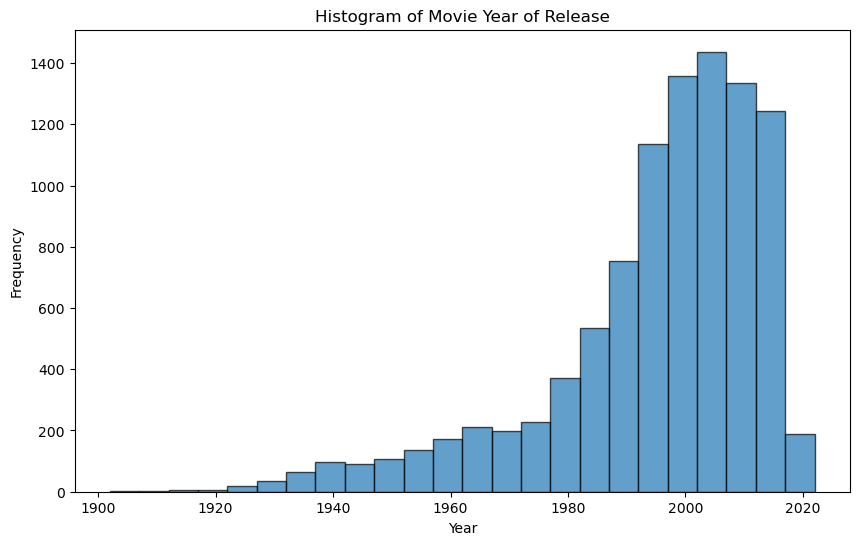

In [29]:
movie['year'] = pd.to_numeric(movie['year'], errors='coerce', downcast='integer') 
plt.figure(figsize=(10,6))
plt.hist(movie['year'], bins=range(movie['year'].min(), movie['year'].max() + 5, 5), edgecolor='black', alpha=0.7)
plt.title("Histogram of Movie Year of Release")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

In [86]:
# The shape of the distribution is skewed to the left, and most movies were released in the year 2005.

In [87]:
# Exercise 3
# Create a bar chart of the top 10 highest-rated movies.

In [31]:
fulldata = pd.merge(movie,rating,on="movieId")
fulldata.head(10)

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,31,5.0,850466616


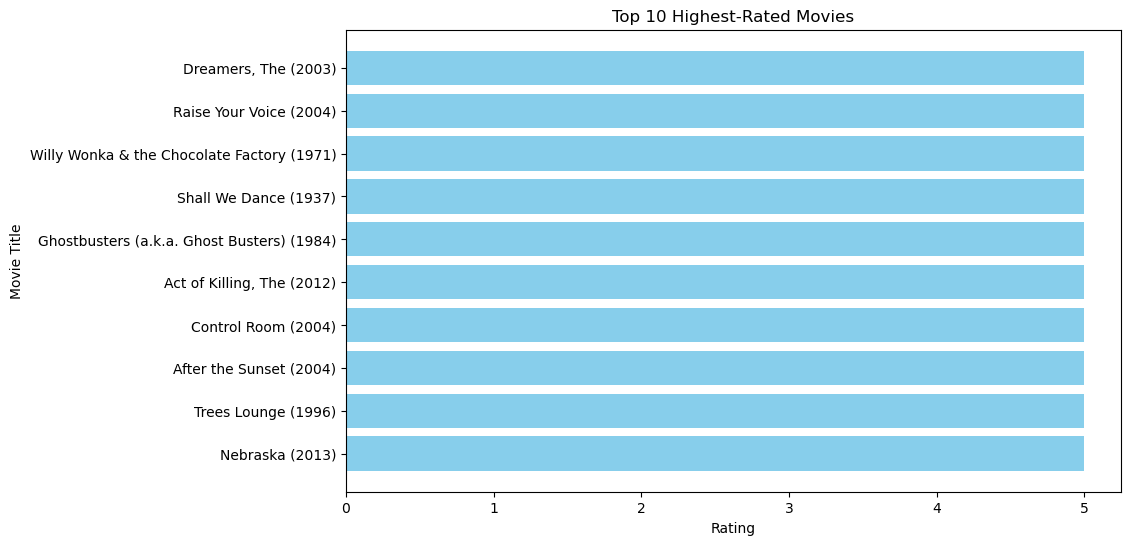

In [33]:
top_10_mov = (
    fulldata
    .drop_duplicates(subset='title')
    .sort_values(by='rating', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6)) 
plt.barh(top_10_mov['title'], top_10_mov['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.show()

In [93]:
# Exercise 4
# Create a variable called string that contains the text of each movie's genres, title, and year of release. For example, the value of string for movieID == 3 should be: "Adventure Children Fantasy Jumanji (1995)".

In [34]:
fulldata['clean_genres'] = fulldata['genres'].str.replace('|', ' ')
fulldata['string'] = fulldata['clean_genres'] + " " + fulldata['title']

fulldata.loc[fulldata['movieId'] == 3, 'string'].values[0]


'Comedy Romance Grumpier Old Men (1995)'

In [21]:
# Exercise 5
# Using the string variable, create a tf-idf matrix with TfidfVectorizer and tfv.fit.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

rec_data = fulldata.copy() # create a copy of the orginal dataset
rec_data
rec_data.drop_duplicates(subset = "title", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)


tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words="english")

tfv_matrix = tfv.fit_transform(rec_data['string'])
tfv_matrix

<9706x3435 sparse matrix of type '<class 'numpy.float64'>'
	with 71966 stored elements in Compressed Sparse Row format>

In [62]:
# Exercise 6
# Use the sigmoid kernel from scikit-learn to calculate pairwise similarities between all items in your tf-idf matrix.

In [39]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix) # Computing sigmoid kernel
rec_indices = pd.Series(rec_data.index, index = rec_data["title"]).drop_duplicates()

In [64]:
# Exercise 7
# Define a function, give_recommendation(), that takes as input the title of a movie and returns the top 10 most similar movies.

In [41]:
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title]

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    movie_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar anime
    rec_dic = {"No" : range(1,11), 
               "Movie Name": fulldata["title"].iloc[movie_indices].values,
               "Rating": fulldata["rating"].iloc[movie_indices].values,}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe.style.set_properties(**{"background-color": "white","color":"black","border": "1.5px  solid black"})

In [66]:
# Exercise 8
# What movies does your recommender system suggest for a user who likes "Toy Story" (released in 1995)

In [42]:
give_recommendation("Toy Story (1995)")

Recommendations for Toy Story (1995) viewers :



,Movie Name,Rating
No,,
1,Pocahontas (1995),3.000000
2,Mary Shelley's Frankenstein (Frankenstein) (1994),3.000000
3,Babe (1995),1.500000
4,While You Were Sleeping (1995),3.000000
5,Dolores Claiborne (1995),3.000000
6,Star Wars: Episode IV - A New Hope (1977),4.000000
7,Braveheart (1995),4.000000
8,French Kiss (1995),3.000000
9,Quiz Show (1994),4.000000
